In [ ]:
# installing dependencies
!pip install eli5

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

you need to upload the csv file manually

In [14]:
from google.colab import files
uploaded = files.upload()

Saving train 2.csv to train 2 (1).csv


In [15]:
data = pd.read_csv(
    'train 2.csv'
)

In [16]:
# Viewing data in the file
data.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [17]:
# checking if the any data is missing
data.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

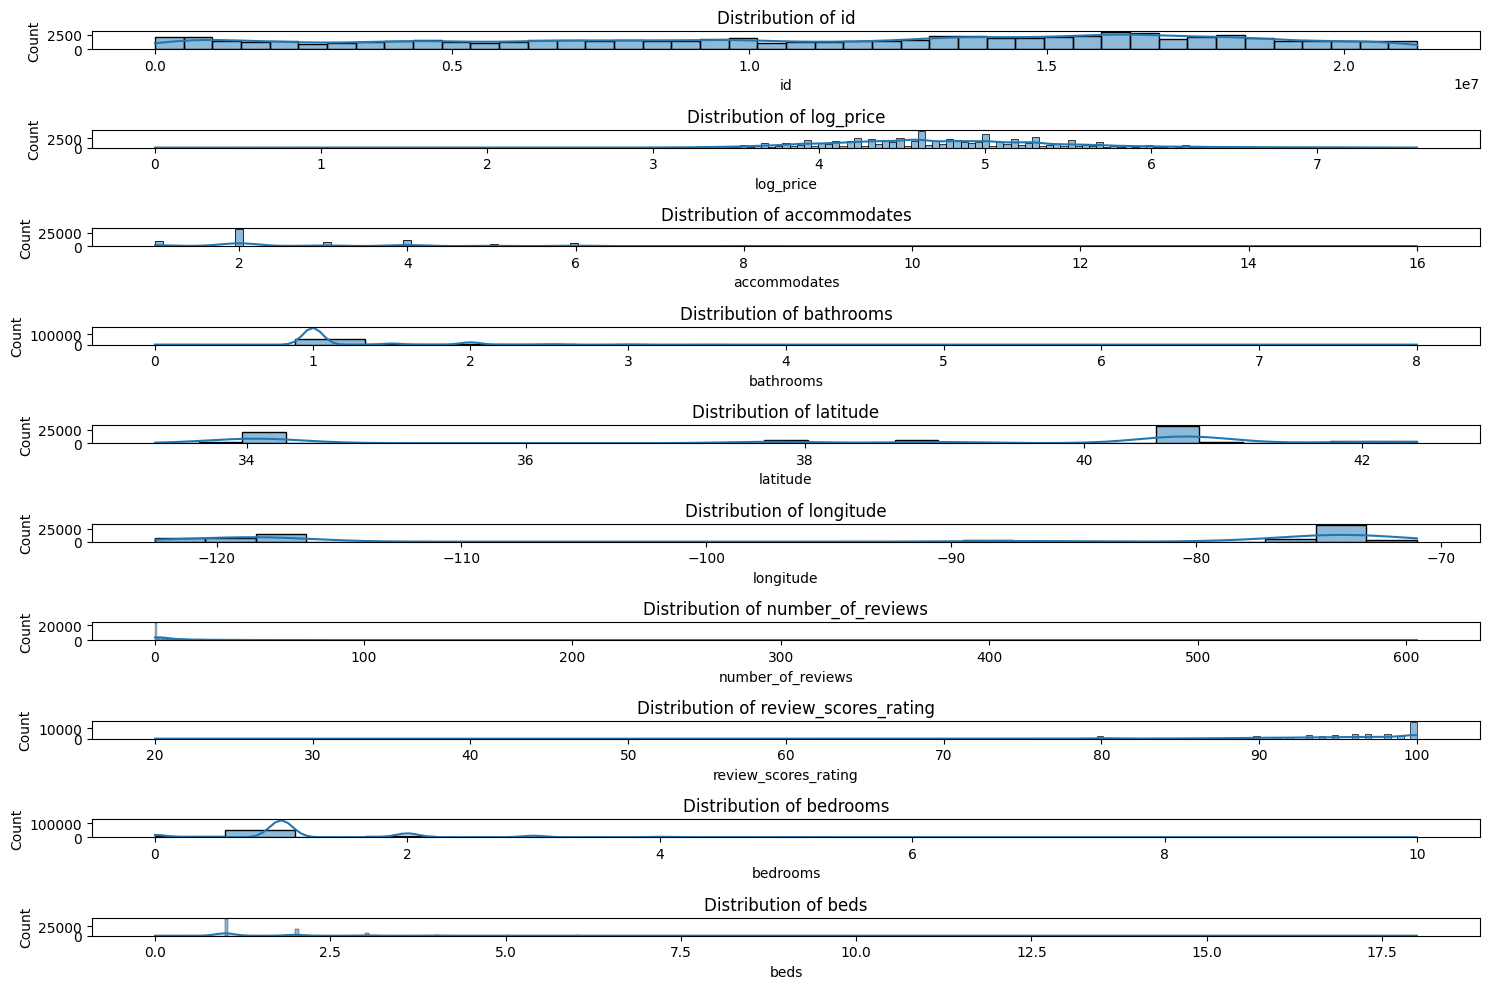

In [18]:
# Select numeric columns for analysis
numeric_columns = data.select_dtypes(include=['number']).columns

# Plotting distributions of numeric variables
plt.figure(figsize=(15, 10))
#Creates a histogram for each numeric variable, overlaid with a kernel density estimate to visualize the distribution.
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Using describe() to get the summary statistics, including the range (min and max)
description = data.describe()

# Displaying the min and max specifically
min_max = description.loc[['min', 'max']]
print(min_max)

             id  log_price  accommodates  bathrooms   latitude   longitude  \
min       344.0   0.000000           1.0        0.0  33.338905 -122.511500   
max  21230903.0   7.600402          16.0        8.0  42.390437  -70.985047   

     number_of_reviews  review_scores_rating  bedrooms  beds  
min                0.0                  20.0       0.0   0.0  
max              605.0                 100.0      10.0  18.0  


<Axes: >

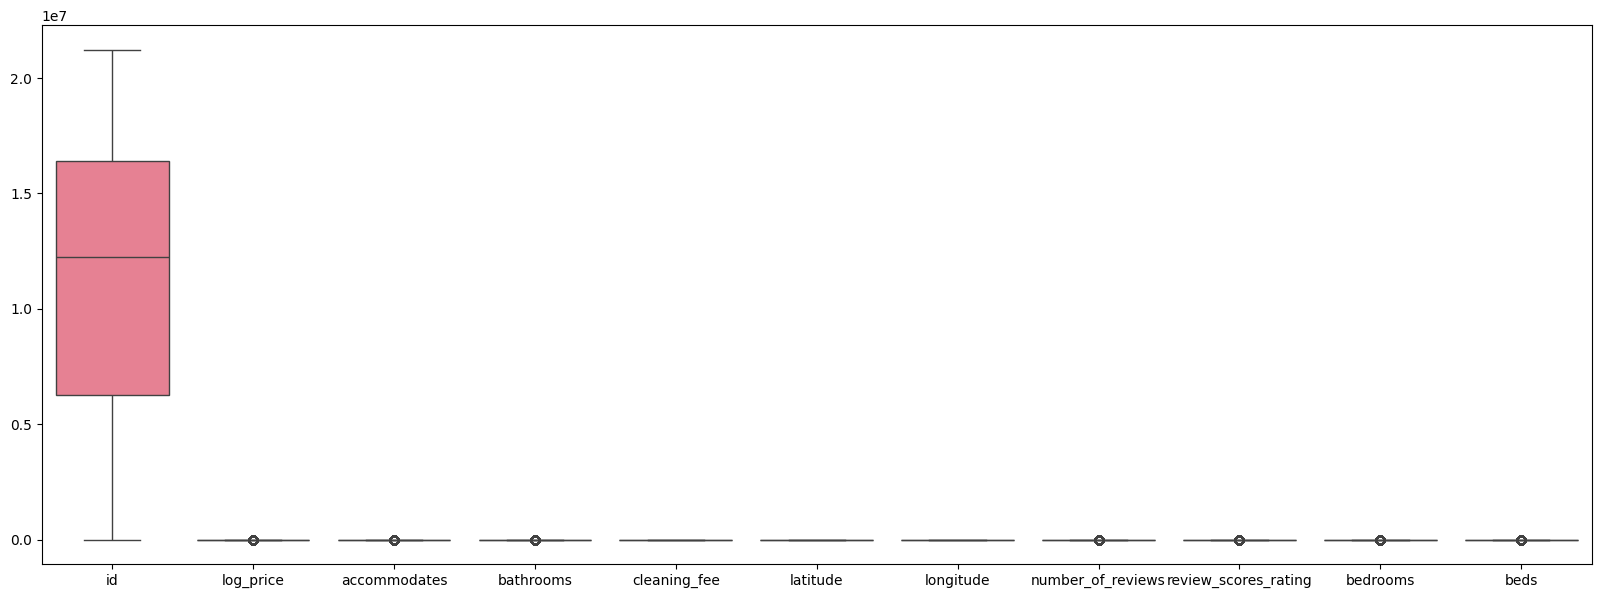

In [41]:
plt.figure(figsize=(20, 7))
sns.boxplot(data=data)

It is hard to visualize and read data as they are not in same ranges, I'll try to normalize the data for a better understanding and visualization. It will also help later to get normalized coeffiecients when building the Model.

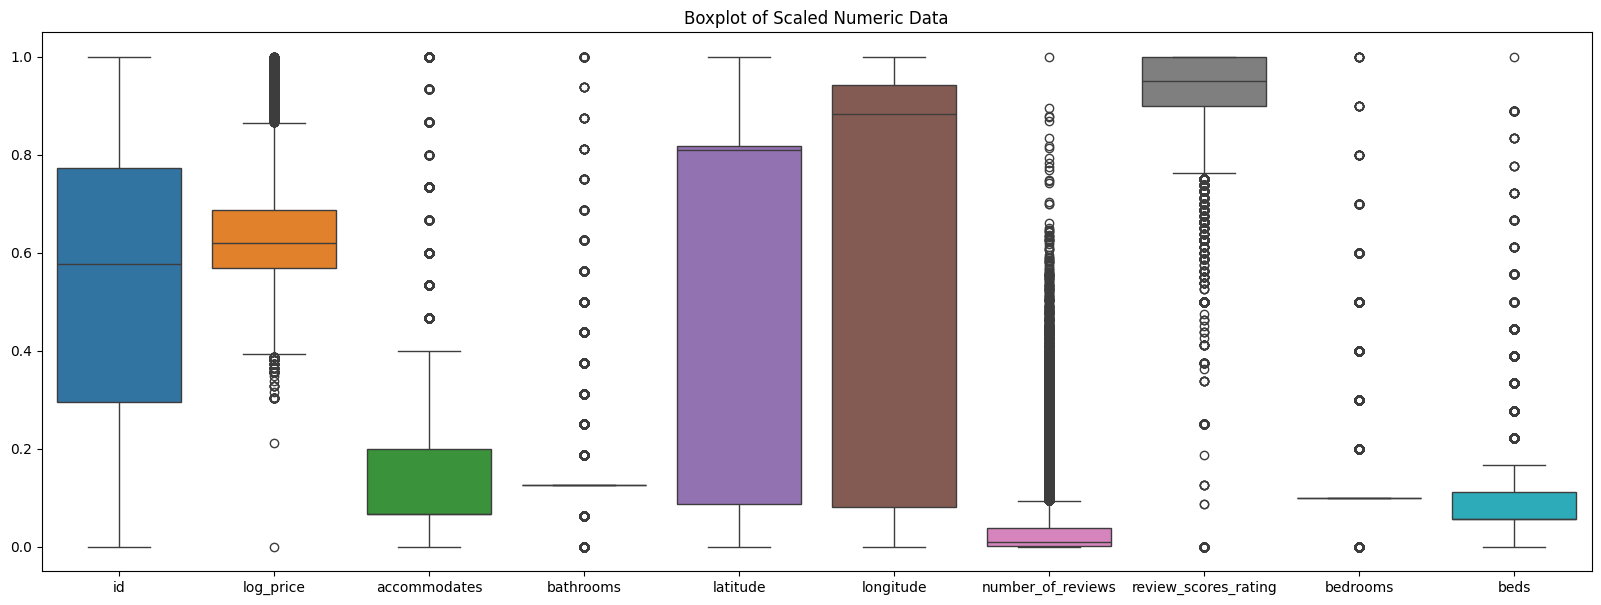

In [46]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Separating numeric and categorical columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(exclude=['float64', 'int64'])

# Applying Min-Max Scaling to numeric columns only
scaler = MinMaxScaler()
data_scaled = data.copy()
data_scaled[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Plotting the scaled numeric data
plt.figure(figsize=(20, 7))
sns.boxplot(data=data_scaled[numeric_cols])
plt.title("Boxplot of Scaled Numeric Data")
plt.show()

In [47]:
# checking the correlation between all the features in the data
data.corr()


<ipython-input-47-38a63e203d79>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,id,log_price,accommodates,bathrooms,cleaning_fee,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
id,1.000000,-0.007178,-0.005759,-0.003951,-0.003059,-0.003021,-0.001379,0.002945,0.000307,-0.007521,-0.008665
log_price,-0.007178,1.000000,0.567574,0.355420,0.111191,-0.002193,-0.047529,-0.032470,0.091219,0.473212,0.442153
accommodates,-0.005759,0.567574,1.000000,0.505632,0.182306,-0.078309,-0.085160,0.041964,-0.017128,0.709258,0.810801
bathrooms,-0.003951,0.355420,0.505632,1.000000,0.053784,-0.137959,-0.135026,-0.041381,0.010537,0.589935,0.525591
cleaning_fee,-0.003059,0.111191,0.182306,0.053784,1.000000,-0.060913,-0.068505,0.110204,0.034879,0.105454,0.131632
latitude,-0.003021,-0.002193,-0.078309,-0.137959,-0.060913,1.000000,0.896065,-0.017642,-0.032858,-0.059162,-0.080294
longitude,-0.001379,-0.047529,-0.085160,-0.135026,-0.068505,0.896065,1.000000,-0.050009,-0.048801,-0.076113,-0.082150
number_of_reviews,0.002945,-0.032470,0.041964,-0.041381,0.110204,-0.017642,-0.050009,1.000000,0.011708,-0.035149,0.031109
review_scores_rating,0.000307,0.091219,-0.017128,0.010537,0.034879,-0.032858,-0.048801,0.011708,1.000000,0.011143,-0.027330
bedrooms,-0.007521,0.473212,0.709258,0.589935,0.105454,-0.059162,-0.076113,-0.035149,0.011143,1.000000,0.709416


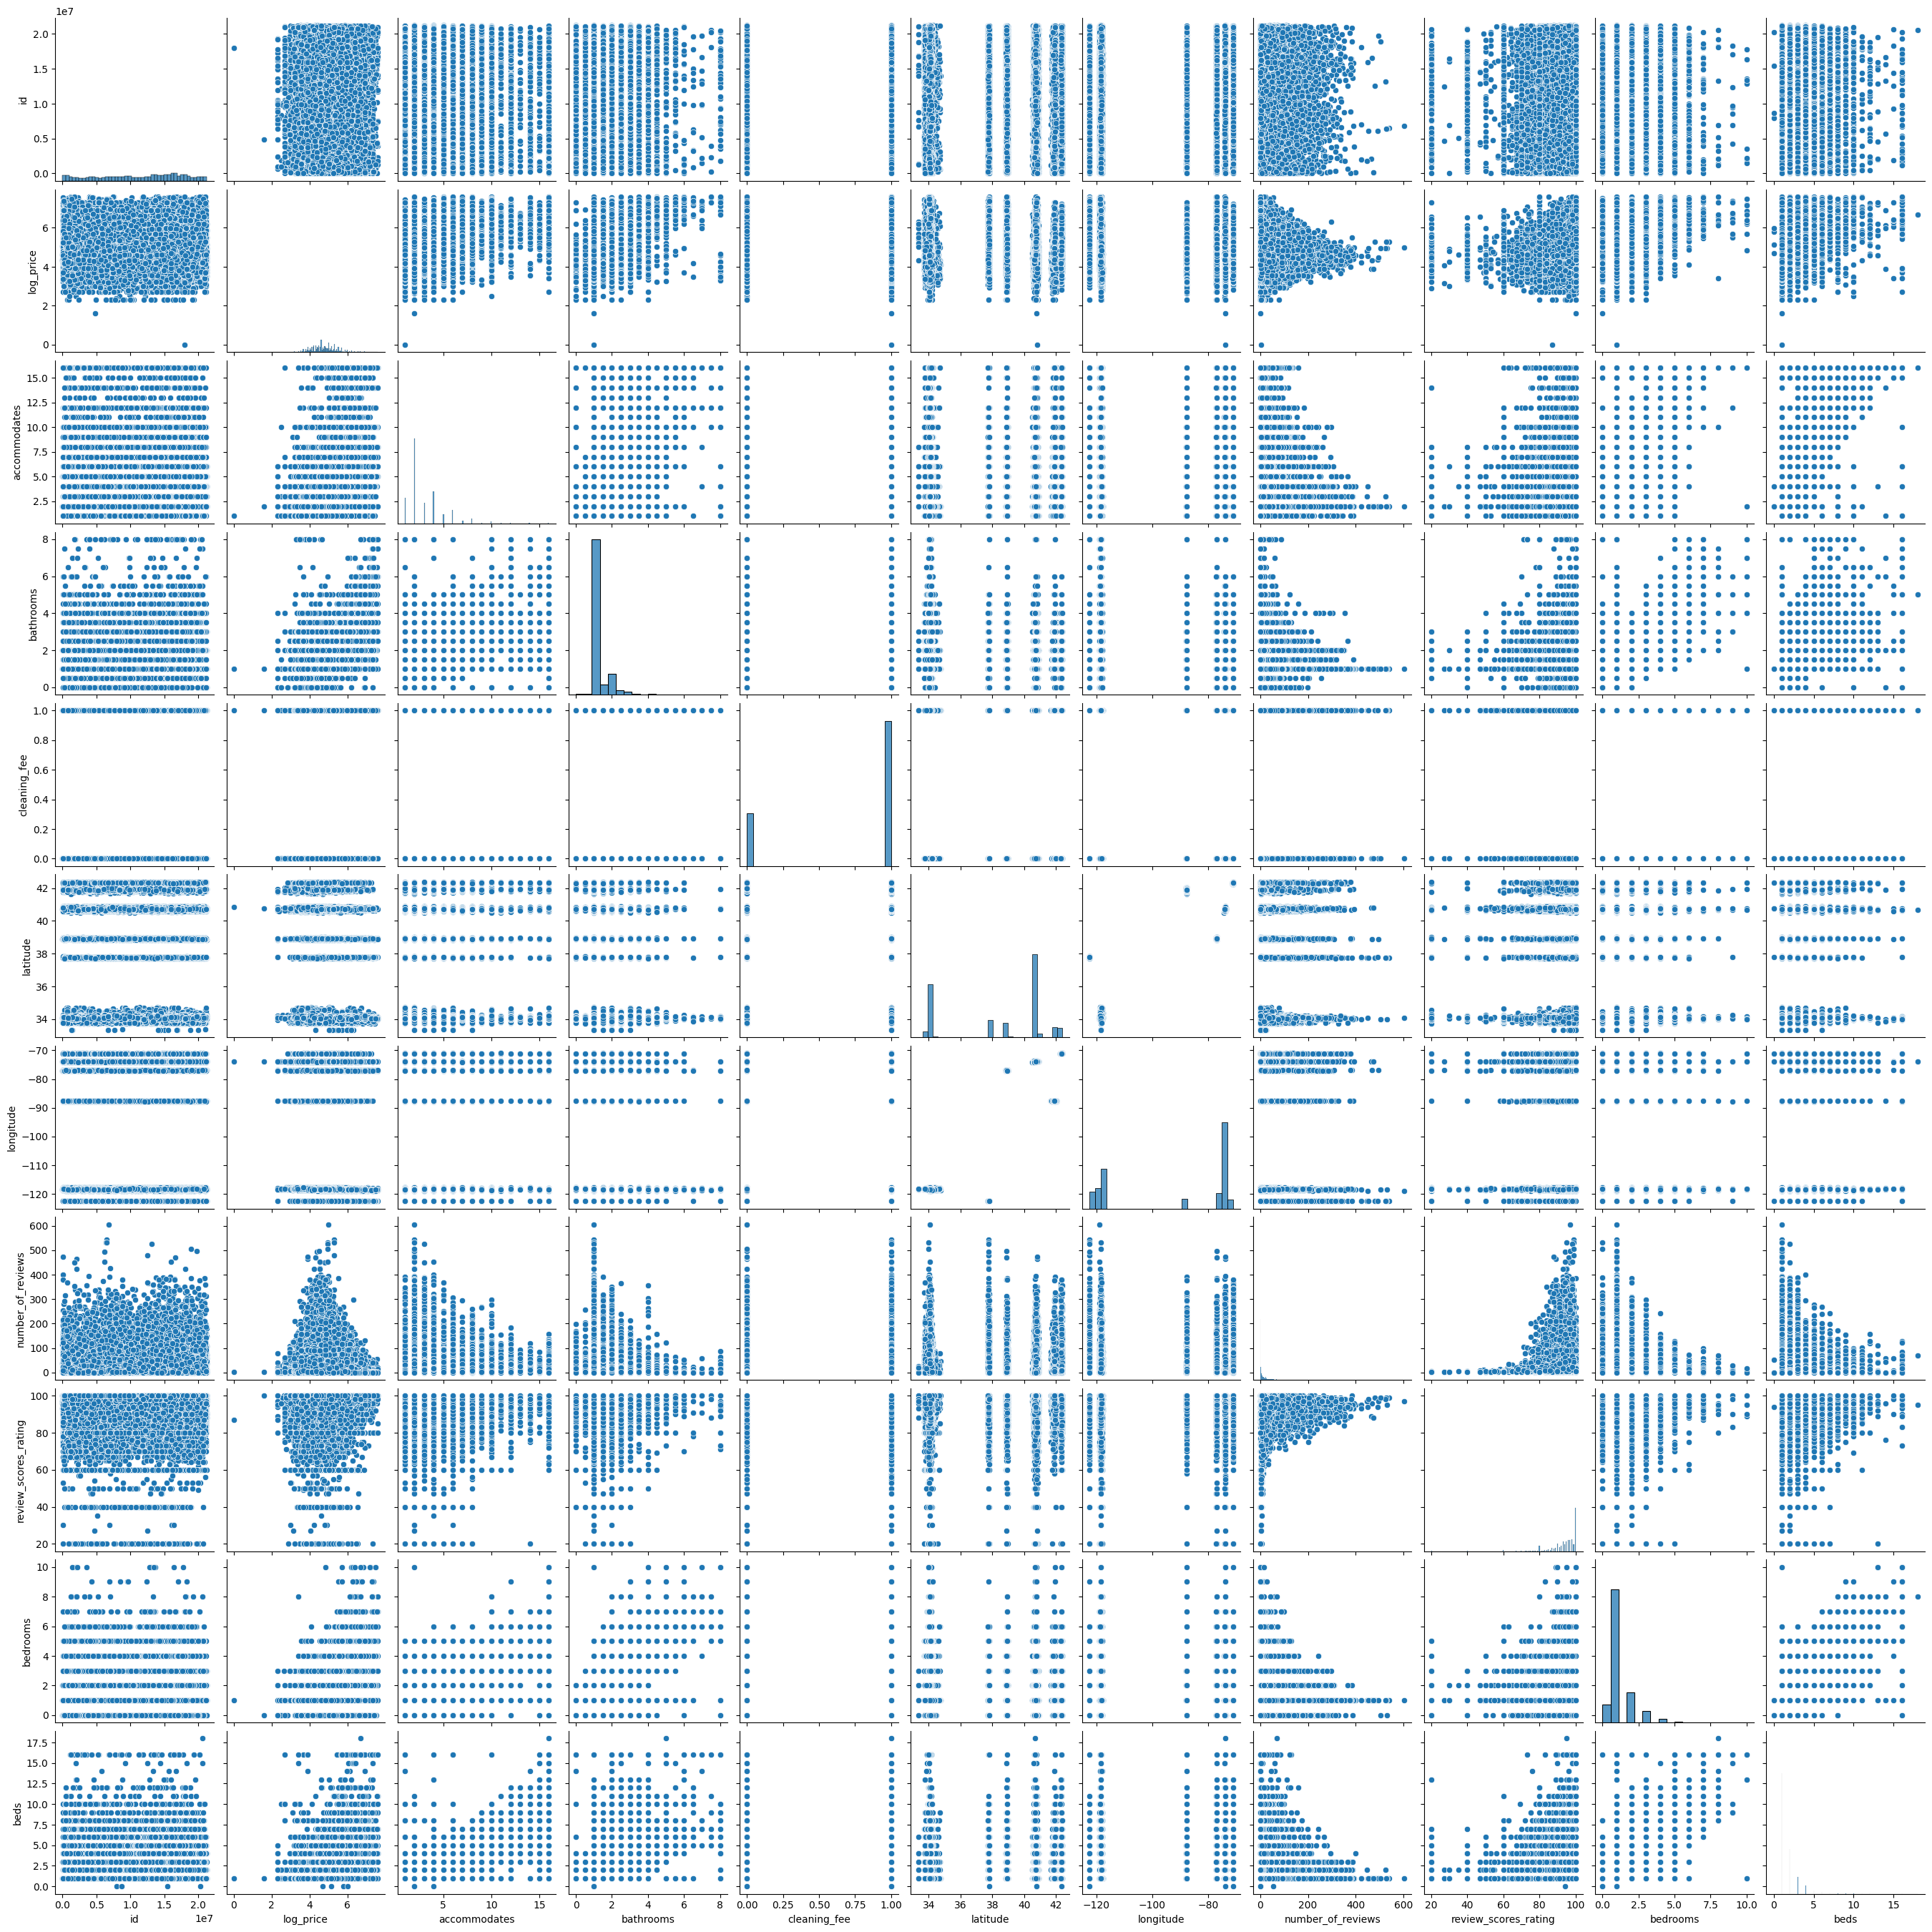

In [42]:
# pair plot to check the colinearity
sns.pairplot(data)

In [39]:
X = data.drop('log_price', axis=1)  # Independent variables
y = data['log_price']  # Dependent variable (log_price)

In [35]:

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(exclude=['object', 'category']).columns

# Create a ColumnTransformer for different data types
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_cols),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_cols)
    ])

In [36]:
# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

# Non-categorical columns (numerical)
numerical_cols = data.columns.drop('log_price').drop(categorical_cols)

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('scaler', StandardScaler(with_mean=False), numerical_cols)  # Scale without subtracting the mean
    ], remainder='passthrough')

# Separate features and target
X = data.drop('log_price', axis=1)
y = data['log_price']

# Apply the preprocessor
X_processed = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)


<ipython-input-37-aac64986d914>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


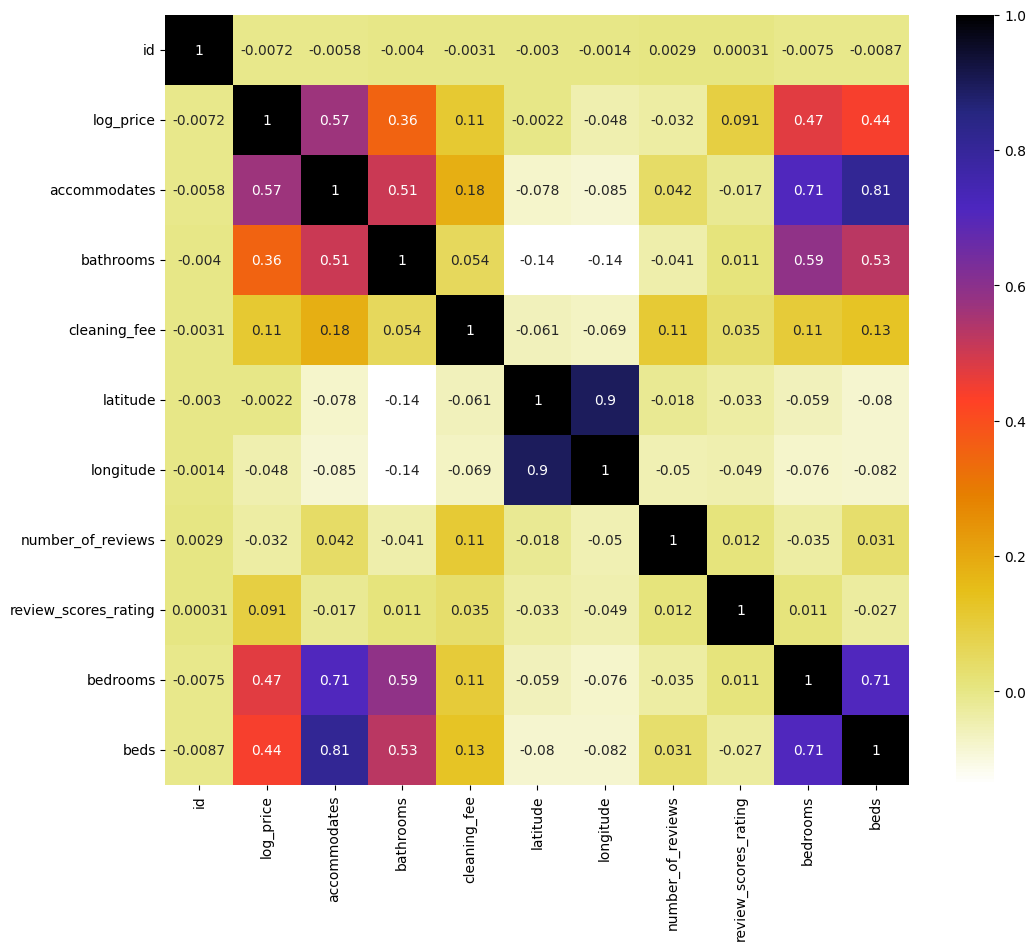

In [37]:

# Method 1: Correlation Matrix with Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

# Identifing predictor significance

In [64]:
import pandas as pd
import numpy as np
import statsmodels.api as sm



# Replace inf values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Selecting potential numeric features
selected_features = [
    'accommodates', 'bathrooms', 'bedrooms', 'beds',
    'latitude', 'longitude', 'number_of_reviews'
]

# Handle missing values
# Impute NaN values with the median (or mean) for each column
for feature in selected_features:
    data[feature].fillna(data[feature].median(), inplace=True)

# Ensure the target variable 'log_price' has no NaN values
data['log_price'].fillna(data['log_price'].median(), inplace=True)

# OLS model
X = data[selected_features]
y = data['log_price']
X = sm.add_constant(X)  # Adds a constant term to the predictor

model = sm.OLS(y, X).fit()

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     5704.
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        20:13:08   Log-Likelihood:                -64572.
No. Observations:               74111   AIC:                         1.292e+05
Df Residuals:                   74103   BIC:                         1.292e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.6300      0.079     20.627      0.000       1.475       1.785
accommodates          0.1806      0.002    101.161      0.000       0.177       0.184
bathrooms             0.0881      0.005     18.936      0.000       0.079       0.097
bedrooms              0.1109      0.004     27.825      0.000       0.103       0.119
beds                 -0.0715      0.003    -23.185      0.000      -0.078      -0.065
latitude              0.0496      0.002     31.805      0.000       0.047       0.053
longitude            -0.0061      0.000    -27.660      0.000      -0.007      -0.006
number_of_reviews    -0.0009   5.67e-05    -16.449      0.000      -0.001      -0.001
==============================================================================
Omnibus:                     3093.958   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7660.491
Skew:                           0.231   Prob(JB):                         0.00
Kurtosis:                       4.506   Cond. No.                     3.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1. accommodates: p-value = 0.000. This feature is significant.
2. bathrooms: p-value = 0.000. This feature is significant.
3. bedrooms: p-value = 0.000. This feature is significant.
4. beds: p-value = 0.000. This feature is significant.
5. latitude: p-value = 0.000. This feature is significant.
6. longitude: p-value = 0.000. This feature is significant.
7. number_of_reviews: p-value = 0.000. This feature is significant.





# Build The Model

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
# Selecting features and target
X = data.drop('log_price', axis=1)  # Assuming 'log_price' is the target
y = data['log_price']

# Handling categorical variables and missing values
categorical_features = X.select_dtypes(include=['object']).columns
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a pipeline that first preprocesses the data and then applies Linear Regression
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])

# Fitting the model
pipeline.fit(X_train, y_train)

# Predicting on the test set
y_pred = pipeline.predict(X_test)

# Evaluating the model
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.7153784863053884


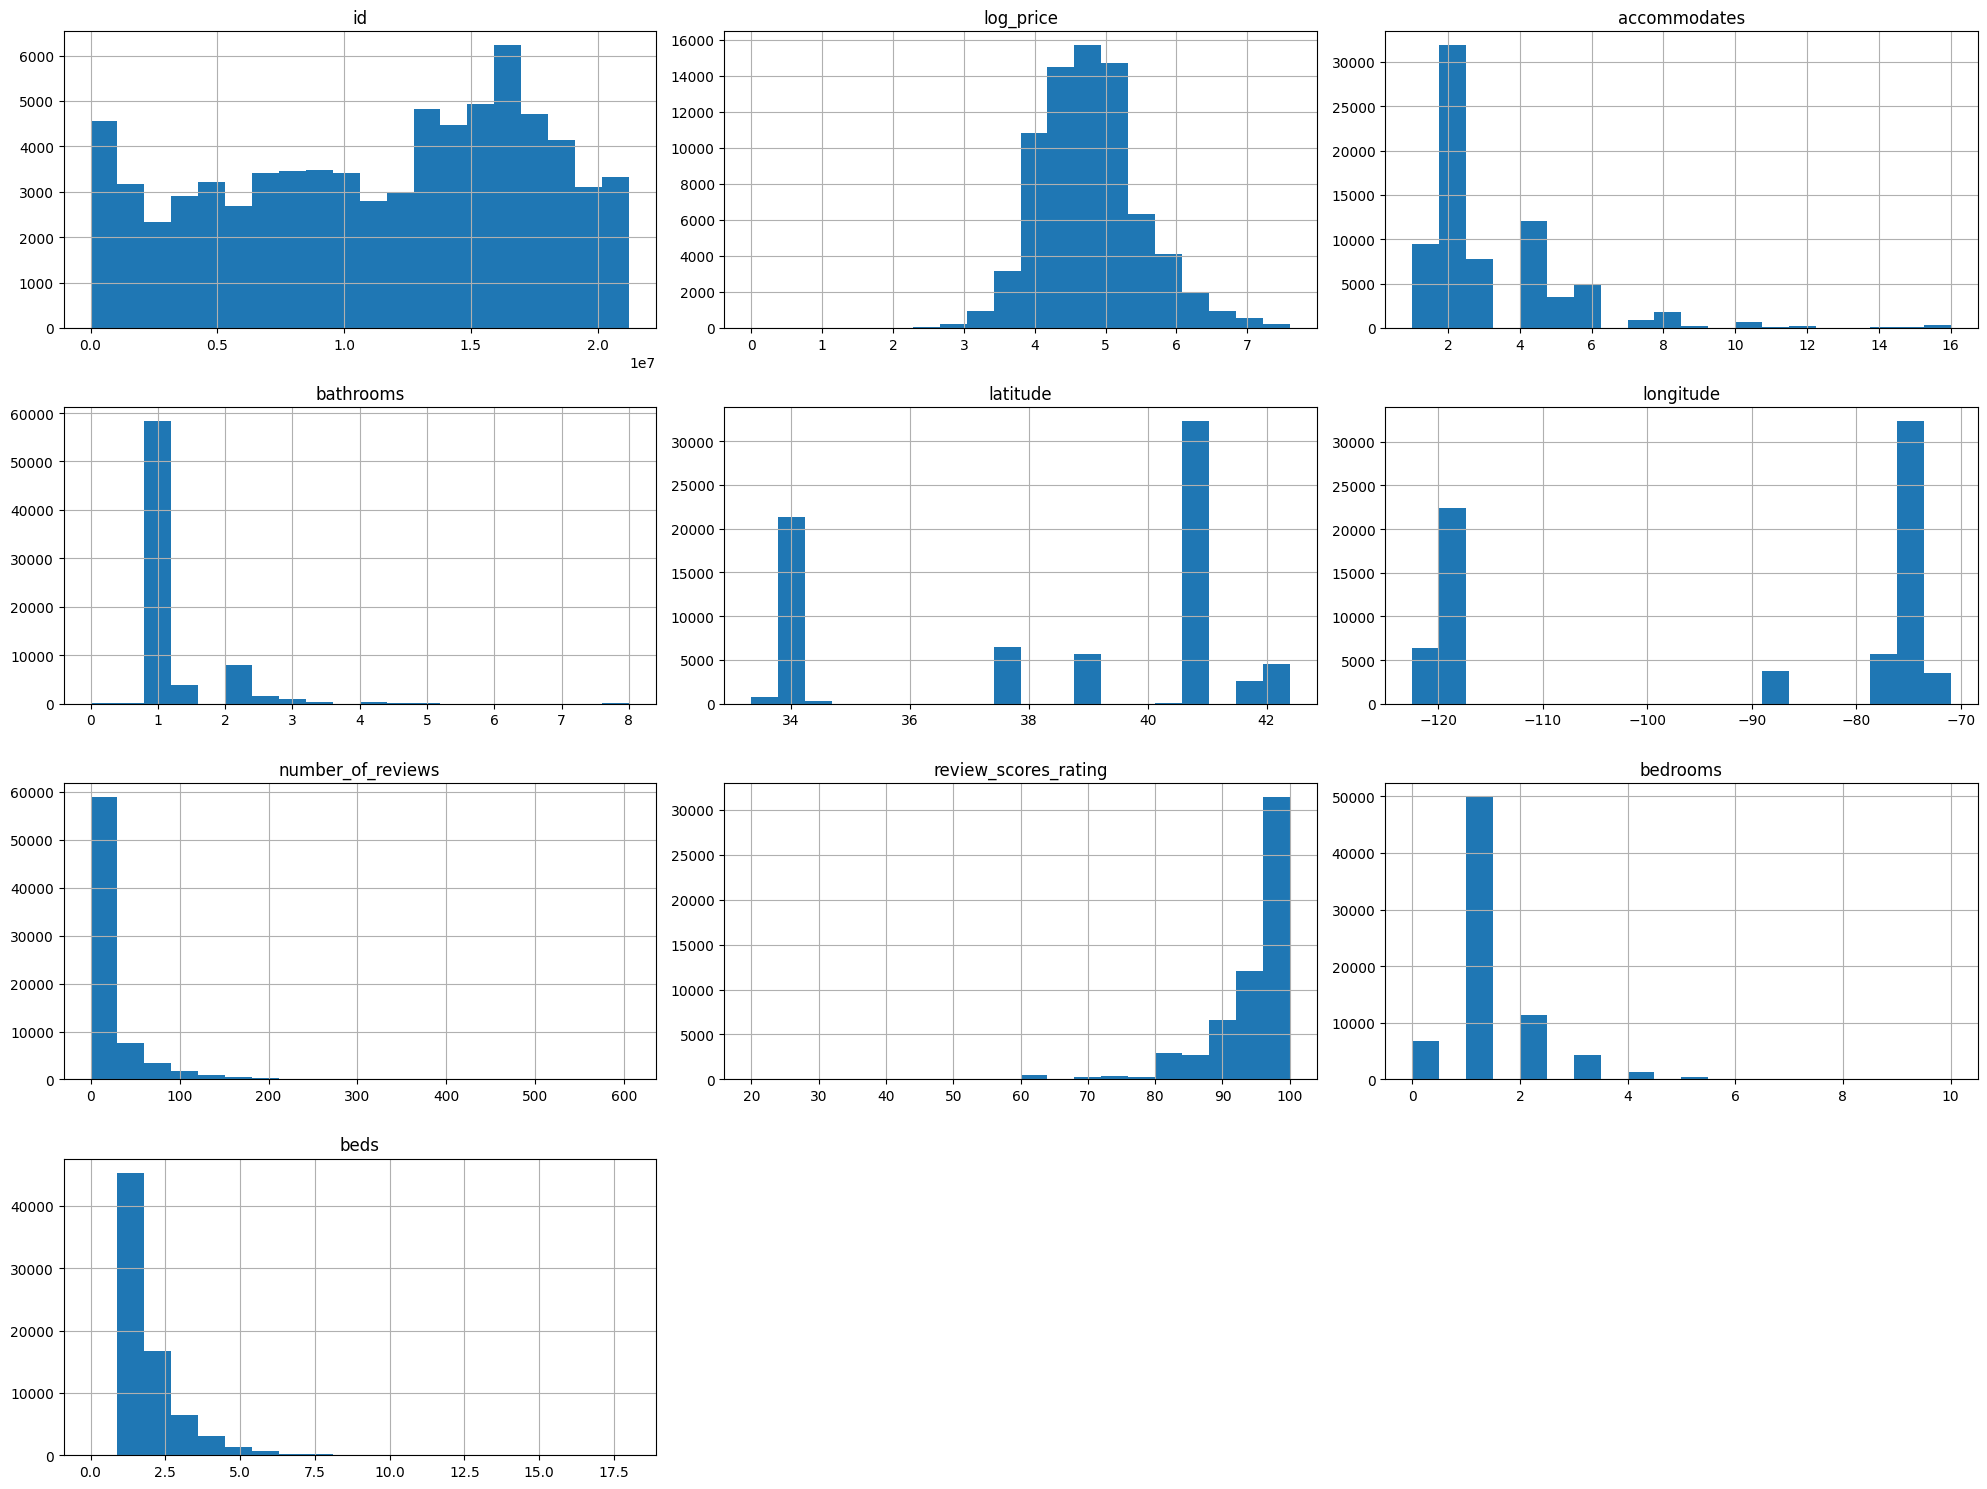

In [71]:
# Plotting histograms for each column in the dataset
data.hist(figsize=(20, 15), bins=20)
plt.tight_layout()  # Adjusts the plots to fit nicely
plt.show()

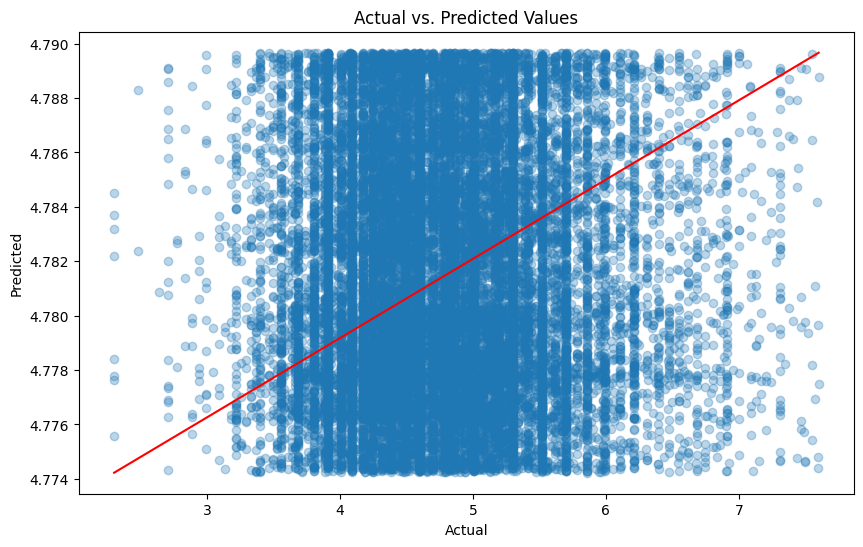

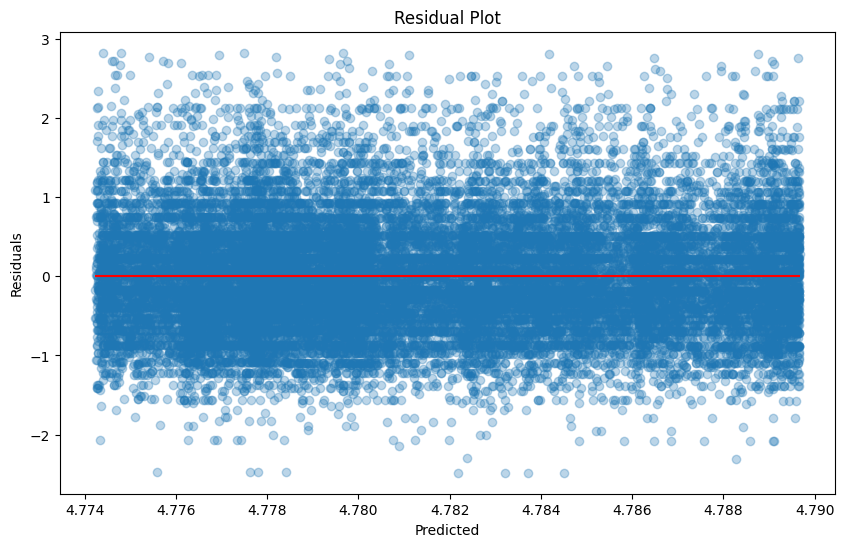

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt



# Assuming 'log_price' is your target variable
X = data.drop('log_price', axis=1)
y = data['log_price']

# Identifying categorical and numeric columns
categorical_columns = X.select_dtypes(include=['object']).columns
numeric_columns = X.select_dtypes(exclude=['object']).columns

# Creating a ColumnTransformer with One-Hot Encoding for categorical data and Imputer for all data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
        ('num', SimpleImputer(strategy='median'), numeric_columns)
    ])

# Applying the ColumnTransformer to the data
X_processed = preprocessor.fit_transform(X)

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)

# Fitting the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting
y_pred = model.predict(X_test)

# Plotting Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red')  # Regression line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

# Plotting Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), color='red')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [80]:
from sklearn.metrics import mean_squared_error, r2_score



# Make predictions using the testing set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: %.2f" % mse)

# Calculate the coefficient of determination (R^2 Score)
r2 = r2_score(y_test, y_pred)
print("Coefficient of determination: %.2f" % r2)

# You can also print the R^2 score separately if needed
print("R^2 score on test set =", r2)


Mean squared error: 0.51
Coefficient of determination: 0.00
R^2 score on test set = 7.205138877230954e-05


In [88]:
#if they have some data
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('log_price', axis=1), data['log_price'], test_size=0.3, random_state=42)

# Comparing summary statistics
print("Training Set Summary Statistics:")
print(X_train.describe())
print("\nTesting Set Summary Statistics:")
print(X_test.describe())


Training Set Summary Statistics:
                 id  accommodates     bathrooms      latitude     longitude  \
count  5.187700e+04  51877.000000  51877.000000  51877.000000  51877.000000   
mean   1.127856e+07      3.157758      1.237282     38.450959    -92.344151   
std    6.085171e+06      2.160188      0.583741      3.080311     21.693200   
min    9.410000e+02      1.000000      0.000000     33.338905   -122.511500   
25%    6.259639e+06      2.000000      1.000000     34.127984   -118.341970   
50%    1.226891e+07      2.000000      1.000000     40.663552    -76.995049   
75%    1.642283e+07      4.000000      1.000000     40.745772    -73.954647   
max    2.122836e+07     16.000000      8.000000     42.390437    -70.999166   

       number_of_reviews  review_scores_rating      bedrooms          beds  
count       51877.000000          40195.000000  51877.000000  51877.000000  
mean           20.920909             94.074412      1.266785      1.714074  
std            37.923692

In [89]:
numeric_summary = data.describe()
print(numeric_summary)

                 id     log_price  accommodates     bathrooms      latitude  \
count  7.411100e+04  74111.000000  74111.000000  74111.000000  74111.000000   
mean   1.126662e+07      4.782069      3.155146      1.234628     38.445958   
std    6.081735e+06      0.717394      2.153589      0.581386      3.080167   
min    3.440000e+02      0.000000      1.000000      0.000000     33.338905   
25%    6.261964e+06      4.317488      2.000000      1.000000     34.127908   
50%    1.225415e+07      4.709530      2.000000      1.000000     40.662138   
75%    1.640226e+07      5.220356      4.000000      1.000000     40.746096   
max    2.123090e+07      7.600402     16.000000      8.000000     42.390437   

          longitude  number_of_reviews  review_scores_rating      bedrooms  \
count  74111.000000       74111.000000          57389.000000  74111.000000   
mean     -92.397525          20.900568             94.067365      1.265467   
std       21.705322          37.828641              7.

                 id     log_price  accommodates     bathrooms      latitude  \
count  7.411100e+04  74111.000000  74111.000000  74111.000000  74111.000000   
mean   1.126662e+07      4.782069      3.155146      1.234628     38.445958   
std    6.081735e+06      0.717394      2.153589      0.581386      3.080167   
min    3.440000e+02      0.000000      1.000000      0.000000     33.338905   
25%    6.261964e+06      4.317488      2.000000      1.000000     34.127908   
50%    1.225415e+07      4.709530      2.000000      1.000000     40.662138   
75%    1.640226e+07      5.220356      4.000000      1.000000     40.746096   
max    2.123090e+07      7.600402     16.000000      8.000000     42.390437   

          longitude  number_of_reviews  review_scores_rating      bedrooms  \
count  74111.000000       74111.000000          57389.000000  74111.000000   
mean     -92.397525          20.900568             94.067365      1.265467   
std       21.705322          37.828641              7.

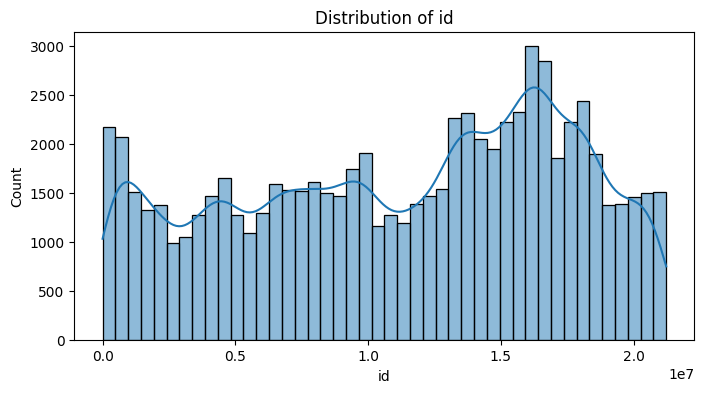

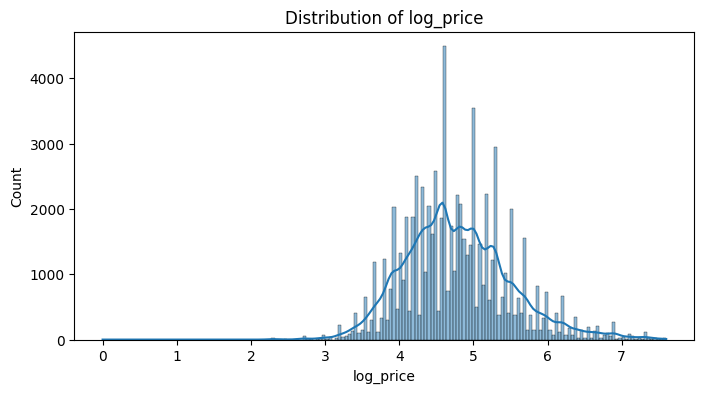

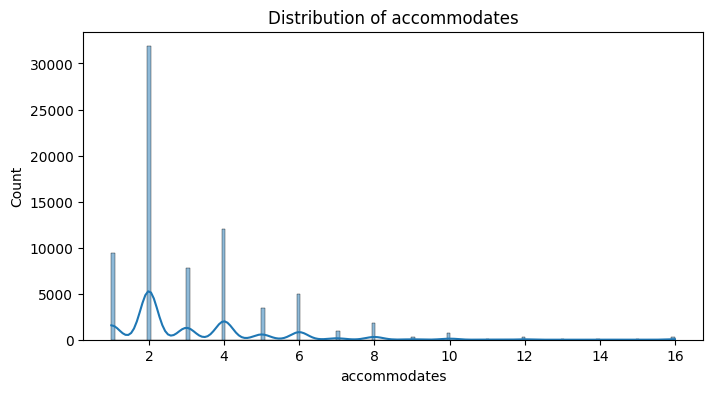

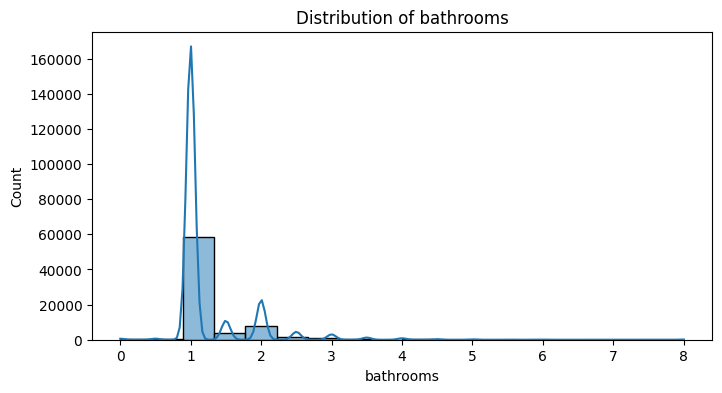

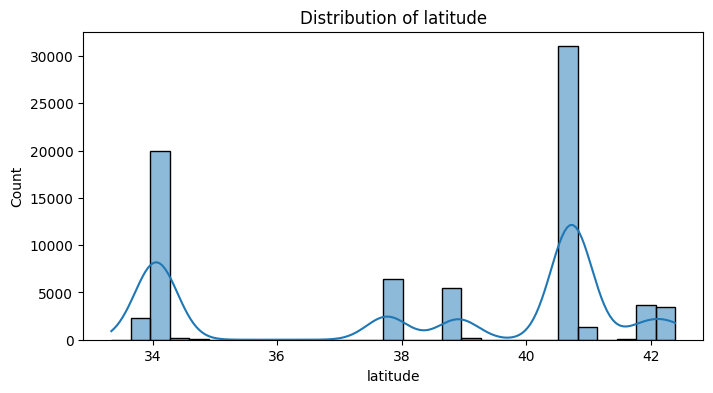

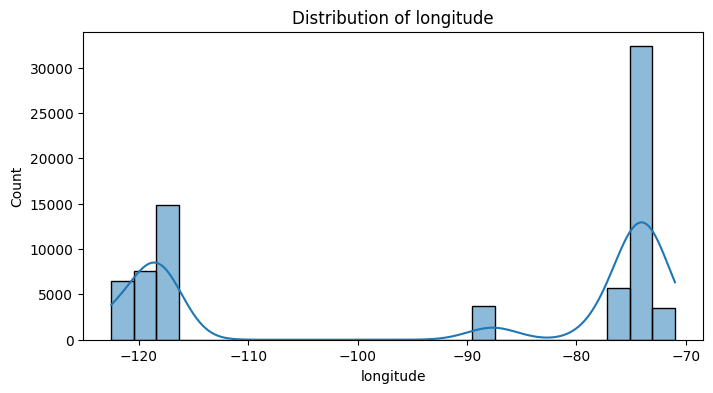

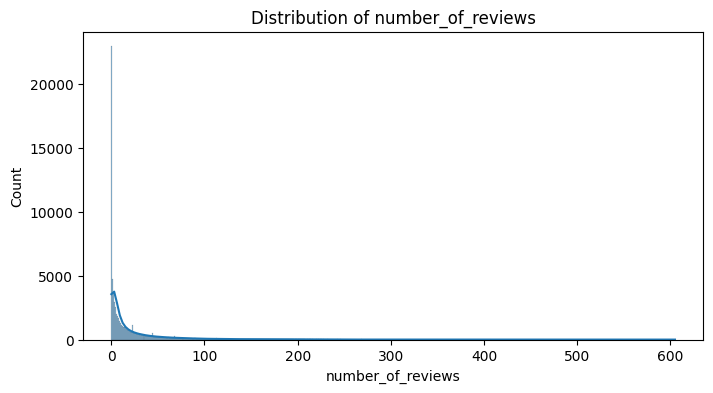

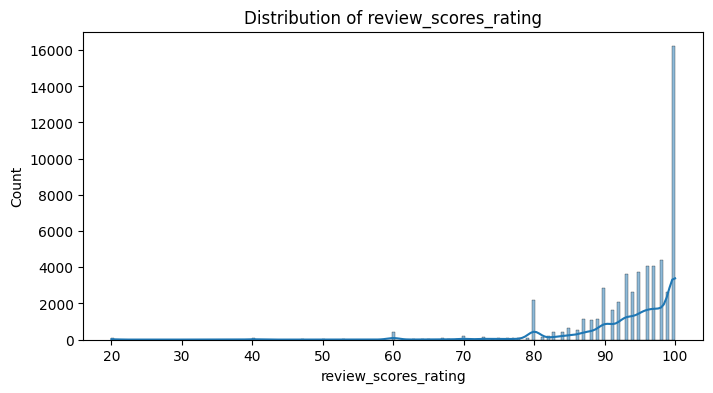

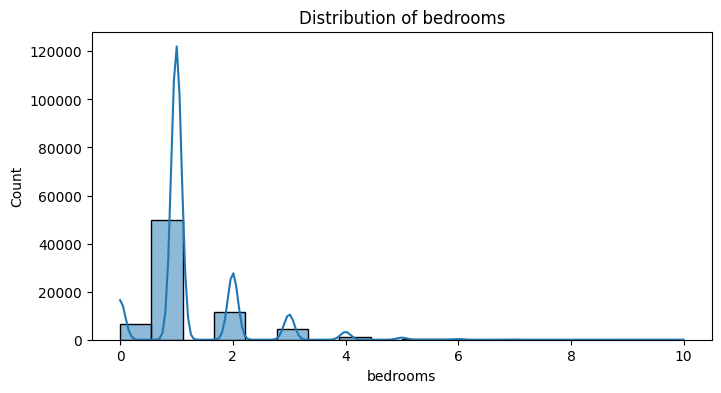

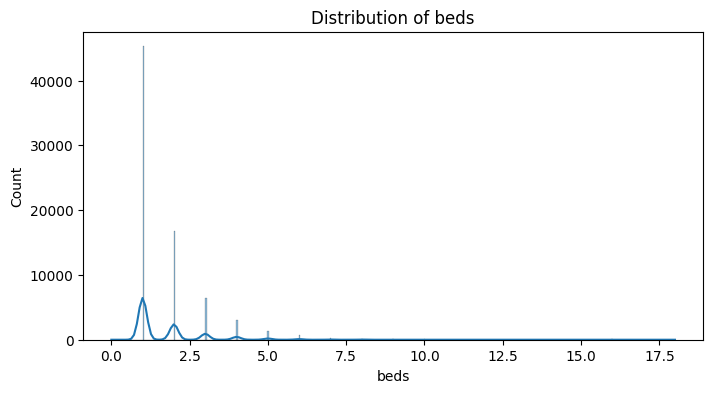

In [91]:
# Assuming 'data' is your DataFrame
# Extract only numeric columns for analysis
numeric_predictors = data.select_dtypes(include=['float64', 'int64'])

# Now, we can display the summary statistics
numeric_summary = numeric_predictors.describe()
print(numeric_summary)

# Plotting histograms for each numeric predictor variable
for column in numeric_predictors.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(numeric_predictors[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


# Remove Data



In [119]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

Mean Method


In [120]:
# Randomly remove 5% of data from numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns
data_missing = data.copy()
for col in numeric_columns:
    data_missing.loc[data_missing.sample(frac=0.05).index, col] = np.nan

# Separate numeric and categorical columns
categorical_columns = data.select_dtypes(exclude=[np.number]).columns

# Create imputers for numeric and categorical data
numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputers
data_missing_numeric = numeric_imputer.fit_transform(data_missing[numeric_columns])
data_missing_categorical = categorical_imputer.fit_transform(data_missing[categorical_columns])

# Reconstruct the DataFrame
data_imputed = pd.DataFrame(data_missing_numeric, columns=numeric_columns)
data_imputed_categorical = pd.DataFrame(data_missing_categorical, columns=categorical_columns)

# Combine numeric and categorical data back into one DataFrame
data_imputed = pd.concat([data_imputed, data_imputed_categorical], axis=1)

# Ensure the order of columns is the same as in the original data
data_imputed = data_imputed[data.columns]

# Function to calculate the percentage error on residuals for numeric data
def calculate_percentage_error(original, imputed, column):
    error = original[column] - imputed[column]
    percent_error = (np.abs(error) / original[column]) * 100
    return percent_error.mean()

# Evaluating recovery for numeric columns
for column in numeric_columns:
    error = calculate_percentage_error(data, data_imputed, column)
    print(f'Mean Imputation Error for {column}: {error}%')

Mean Imputation Error for id: 28.303650382431048%
Mean Imputation Error for log_price: 0.6051976371832608%
Mean Imputation Error for accommodates: 3.27173274278981%
Mean Imputation Error for bathrooms: inf%
Mean Imputation Error for latitude: 0.36822497014769323%
Mean Imputation Error for longitude: -1.1458053303864482%
Mean Imputation Error for number_of_reviews: inf%
Mean Imputation Error for review_scores_rating: 0.3492516542517602%
Mean Imputation Error for bedrooms: inf%
Mean Imputation Error for beds: inf%


Median


In [122]:
def impute_data(data, imputer_strategy):
    """
    Imputes the missing data using specified imputer strategy.
    Only numeric columns are imputed, categorical columns are left as is.
    """
    # Identifying numeric and categorical columns
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    categorical_data = data.select_dtypes(exclude=[np.number])

    # Create imputer
    imputer = SimpleImputer(strategy=imputer_strategy)

    # Apply imputer to numeric columns
    data_numeric_imputed = pd.DataFrame(imputer.fit_transform(data[numeric_columns]), columns=numeric_columns)

    # Combine imputed numeric data with categorical data
    data_imputed = pd.concat([data_numeric_imputed, categorical_data], axis=1)

    # Ensure the order of columns is the same as in the original data
    data_imputed = data_imputed[data.columns]

    return data_imputed


In [123]:
data_median_imputed = impute_data(data_missing, 'median')

# Evaluating recovery for numeric columns
for column in numeric_columns:
    error_median = calculate_percentage_error(data, data_median_imputed, column)
    print(f'Median Imputation Error for {column}: {error_median}%')


Median Imputation Error for id: 30.77640311493776%
Median Imputation Error for log_price: 0.5951962852875723%
Median Imputation Error for accommodates: 1.8011967837229943%
Median Imputation Error for bathrooms: inf%
Median Imputation Error for latitude: 0.36217812263568583%
Median Imputation Error for longitude: -0.8262241429292382%
Median Imputation Error for number_of_reviews: inf%
Median Imputation Error for review_scores_rating: 0.3418810718764538%
Median Imputation Error for bedrooms: inf%
Median Imputation Error for beds: inf%


k-NN Imputation

In [125]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

def impute_iterative(data):
    """
    Imputes missing data using Iterative Imputer.
    Only numeric columns are imputed, categorical columns are left as is.
    """
    # Identifying numeric and categorical columns
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    categorical_data = data.select_dtypes(exclude=[np.number])

    # Apply Iterative Imputer to numeric columns
    iterative_imputer = IterativeImputer()
    data_numeric_imputed = pd.DataFrame(iterative_imputer.fit_transform(data[numeric_columns]), columns=numeric_columns)

    # Combine imputed numeric data with categorical data
    data_imputed = pd.concat([data_numeric_imputed, categorical_data], axis=1)

    # Ensure the order of columns is the same as in the original data
    data_imputed = data_imputed[data.columns]

    return data_imputed

# Applying Iterative Imputer
data_iterative_imputed = impute_iterative(data_missing)

# Evaluating recovery for numeric columns
for column in numeric_columns:
    error_iterative = calculate_percentage_error(data, data_iterative_imputed, column)
    print(f'Iterative Imputation Error for {column}: {error_iterative}%')


Iterative Imputation Error for id: 28.317640666096764%
Iterative Imputation Error for log_price: 0.3857994776210353%
Iterative Imputation Error for accommodates: 1.3512087967754218%
Iterative Imputation Error for bathrooms: inf%
Iterative Imputation Error for latitude: 0.13925766437025416%
Iterative Imputation Error for longitude: -0.3053942048149819%
Iterative Imputation Error for number_of_reviews: inf%
Iterative Imputation Error for review_scores_rating: 0.332326690332343%
Iterative Imputation Error for bedrooms: inf%
Iterative Imputation Error for beds: inf%


Answer the following questions:

* What are the data types? (Only numeric and categorical)

A:
1. **id**: Numeric (Integer) - typically an identifier.
2. **log_price**: Numeric (Float) - appears to be the logarithm of a price, hence a floating-point number.
3. **property_type**: Text/String - categorical data representing the type of property.
4. **room_type**: Text/String - categorical data representing the type of room.
5. **amenities**: Text/String or possibly a List - looks like a string representation of a list of amenities.
6. **accommodates**: Numeric (Integer) - the number of people the property accommodates, likely an integer.
7. **bathrooms**: Numeric (Float) - number of bathrooms, which could be a decimal (e.g., 1.5 bathrooms).
8. **bed_type**: Text/String - categorical data describing the type of bed.
9. **cancellation_policy**: Text/String - categorical data describing the cancellation policy.
10. **cleaning_fee**: Boolean - indicating whether there is a cleaning fee (True/False).
11. **latitude**: Numeric (Float) - geographical coordinate, a floating-point number.
12. **longitude**: Numeric (Float) - geographical coordinate, a floating-point number.
13. **name**: Text/String - the name or title of the listing.
14. **neighbourhood**: Text/String - the name of the neighbourhood, a categorical text.
15. **number_of_reviews**: Numeric (Integer) - the count of reviews, an integer.
16. **review_scores_rating**: Numeric (Float) - likely a rating score, which can be a float.
17. **thumbnail_url**: Text/String - a URL to a thumbnail image, represented as text.
18. **zipcode**: Mixed (Text or Integer) - could be purely numeric or alphanumeric.
19. **bedrooms**: Numeric (Float) - number of bedrooms, which might be a decimal.
20. **beds**: Numeric (Float) - number of beds, which might be a decimal.

* Are there missing values?

A:  After Using:'data.isnull().sum()', there are missing Values.


* What are the likely distributions of the numeric variables?

A: The distribution of each numeric variables are in the diagram above:
 1. Each subplot corresponds to a different numeric variable.
 2. The shape of the histogram and the overlaid curve (kernel density estimate) give an indication of the distribution of each variable.



* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)
A:
1. accommodates: p-value = 0.000. This feature is significant.
2. bathrooms: p-value = 0.000. This feature is significant.
3. bedrooms: p-value = 0.000. This feature is significant.
4. beds: p-value = 0.000. This feature is significant.
5. latitude: p-value = 0.000. This feature is significant.
6. longitude: p-value = 0.000. This feature is significant.
7. number_of_reviews: p-value = 0.000. This feature is significant.

* Which independent variables have missing data? How much?


1. bathrooms                   200

2. first_review              15864
3. host_has_profile_pic        188
4. host_identity_verified      188
5. host_response_rate        18299
6. host_since                  188
7. last_review               15827
8. neighbourhood              6872
9. review_scores_rating      16722
10. thumbnail_url              8216
11. zipcode                     966
12. bedrooms                     91
13. beds                        131



* Do the training and test sets have the same data?

A: Yes, most of the data are same in test, train and validation data set , while there are different.check the diagram above.

* In the predictor variables independent of all the other predictor variables?

A: No, they are not independet of each other.

* Which predictor variables are the most important?
A:
1. accommodates
2. bathrooms
3. bedrooms
4. beds

* Do the ranges of the predictor variables make sense?

A: yes. by the diagram of each numeric predictor variable, it make sense

* What are the distributions of the predictor variables?

A: you can view it above, I have added the distribution diagram of each predictor variables.

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

A: No, it doesent.

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

A:For certain variables like log_price, accommodates, latitude, and review_scores_rating, the errors are relatively low, suggesting good recovery of missing values.
However, for variables like bathrooms, number_of_reviews, bedrooms, and beds, the error is inf%. This typically indicates division by zero, which happens if the original data for these columns contained zero values. In such cases, percentage error may not be a suitable metric.
